# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [2]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

splitfile_1.csv
splitfile_10.csv
splitfile_11.csv
splitfile_12.csv
splitfile_13.csv
splitfile_14.csv
splitfile_15.csv
splitfile_16.csv
splitfile_2.csv
splitfile_3.csv
splitfile_4.csv
splitfile_5.csv
splitfile_6.csv
splitfile_7.csv
splitfile_8.csv
splitfile_9.csv
testdata.manual.2009.06.14.csv


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [3]:
# Load the data
dataframe = pd.read_csv("data/training.1600000.processed.noemoticon.csv", sep=',', names=['labels','id', 'data', 'query', 'user', 'text'], encoding='ISO-8859-1', header=None)
dataframe.head()

,labels,id,data,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C01924D30>,
      dtype=object)

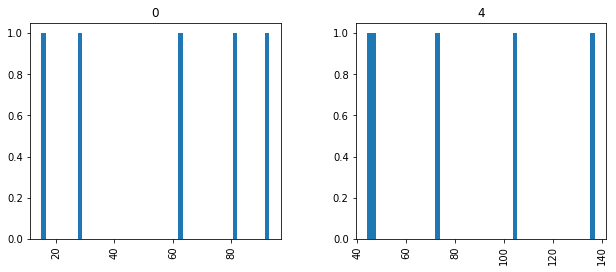

In [7]:
# Preprocess the data
dataframe_short = dataframe[799995:800005]

twitterData = dataframe_short.drop(columns=['id', 'data', 'query', 'user'])
#twitterData.describe()
twitterData.groupby('labels').describe()
twitterData['length'] = twitterData['text'].apply(len)
#twitterData['length'].plot(bins = 50, kind = 'hist', figsize = (6, 4))
twitterData.hist(column = 'length', by = 'labels', bins = 50, figsize = (10, 4))

In [20]:
#twitterData.info()
twitterText = twitterData.drop(columns=['length', 'labels'])
#twitterText.head()

dfToList = twitterText['text'].tolist()
#a = numpy.asarray(twitterText)
dfToA = twitterText.values.flatten()
print(dfToA)
#print("The length of list is: ", len(dfToList))
#for x in range(len(dfToList)): 
#    print(dfToList[x])
#print("dfToList is", dfToList[0], "and it's a", type(dfToList))

#corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
count_vector = CountVectorizer()
count_vector.fit(dfToA)
names = count_vector.get_feature_names()
names

doc_array = count_vector.transform(dfToA).toarray()
doc_array

frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

['Sick  Spending my day laying in bed listening to @taylorswift13'
 'Gmail is down? ' 'rest in peace Farrah! So sad '
 '@Eric_Urbane Sounds like a rival is flagging your ads. Not much you can do about that though '
 'has to resit exams over summer...  wishes he worked harder at first year of uni...'
 'I LOVE @Health4UandPets u guys r the best!! '
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '
 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'
 '@LovesBrooklyn2 he has that effect on everyone ']


,about,add,ads,and,area,at,be,bed,being,best,...,up,wait,were,when,wishes,with,worked,year,you,your
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
7,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
8,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
